# TABULAR PLAYGROUND SERIES JAN 2022

In [30]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
FOLDER_PATH = 'tps-jan-2022'
TRAIN_FILE = 'train.csv'
TEST_FILE = 'test.csv'

TRAIN_PATH = os.path.join(FOLDER_PATH, TRAIN_FILE)
TEST_PATH = os.path.join(FOLDER_PATH, TEST_FILE)

In [19]:
train_df = pd.read_csv(TRAIN_PATH, parse_dates=['date'])
test_df = pd.read_csv(TEST_PATH, parse_dates=['date'])

In [20]:
train_df.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [21]:
test_df.head(20)

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat
5,26303,2019-01-01,Finland,KaggleRama,Kaggle Sticker
6,26304,2019-01-01,Norway,KaggleMart,Kaggle Mug
7,26305,2019-01-01,Norway,KaggleMart,Kaggle Hat
8,26306,2019-01-01,Norway,KaggleMart,Kaggle Sticker
9,26307,2019-01-01,Norway,KaggleRama,Kaggle Mug


In [6]:
train_df.shape

(26298, 6)

In [7]:
test_df.shape

(6570, 5)

In [10]:
for col in train_df.columns.tolist()[2:-1]:
    print(train_df[col].value_counts())
    print('-------------------------------')

Finland    8766
Norway     8766
Sweden     8766
Name: country, dtype: int64
-------------------------------
KaggleMart    13149
KaggleRama    13149
Name: store, dtype: int64
-------------------------------
Kaggle Mug        8766
Kaggle Hat        8766
Kaggle Sticker    8766
Name: product, dtype: int64
-------------------------------


In [11]:
for col in test_df.columns.tolist()[2:]:
    print(test_df[col].value_counts())
    print('-------------------------')

Finland    2190
Norway     2190
Sweden     2190
Name: country, dtype: int64
-------------------------
KaggleMart    3285
KaggleRama    3285
Name: store, dtype: int64
-------------------------
Kaggle Mug        2190
Kaggle Hat        2190
Kaggle Sticker    2190
Name: product, dtype: int64
-------------------------


In [14]:
train_df.isna().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [15]:
test_df.isna().sum()

row_id     0
date       0
country    0
store      0
product    0
dtype: int64

In [22]:
train_df.dtypes

row_id               int64
date        datetime64[ns]
country             object
store               object
product             object
num_sold             int64
dtype: object

In [23]:
test_df.dtypes

row_id              int64
date       datetime64[ns]
country            object
store              object
product            object
dtype: object

### TRANSFORM DATA (PIVOT TABLE)

In [25]:
train_pv = pd.pivot_table(train_df, values='num_sold', 
                          index=['date'], columns=['country', 'store', 'product'], 
                          aggfunc=np.sum, fill_value=0)
train_pv.head()

country       Finland                                                  \
store      KaggleMart                           KaggleRama              
product    Kaggle Hat Kaggle Mug Kaggle Sticker Kaggle Hat Kaggle Mug   
date                                                                    
2015-01-01        520        329            146        911        572   
2015-01-02        493        318            127        794        544   
2015-01-03        535        360            141        843        579   
2015-01-04        544        332            125        873        582   
2015-01-05        378        243            102        668        423   

country                       Norway                                       \
store                     KaggleMart                           KaggleRama   
product    Kaggle Sticker Kaggle Hat Kaggle Mug Kaggle Sticker Kaggle Hat   
date                                                                        
2015-01-01            283        906        526            250       1461   
2015-01-02            249        845        538            237       1446   
2015-01-03            265        930        614            254       1631   
2015-01-04            245        889        589            255       1540   
2015-01-05            187        671        435            184       1126   

country                                  Sweden                            \
store                                KaggleMart                             
product    Kaggle Mug Kaggle Sticker Kaggle Hat Kaggle Mug Kaggle Sticker   
date                                                                        
2015-01-01       1005            395        624        440            175   
2015-01-02        949            415        572        384            155   
2015-01-03       1029            451        630        420            173   
2015-01-04        957            455        697        406            169   
2015-01-05        739            310        442        298            127   

country                                          
store      KaggleRama                            
product    Kaggle Hat Kaggle Mug Kaggle Sticker  
date                                             
2015-01-01       1195        706            324  
2015-01-02        986        653            293  
2015-01-03       1167        734            319  
2015-01-04       1112        657            300  
2015-01-05        796        512            227

In [55]:
fin_mart = train_pv.loc[:, ('Finland', 'KaggleMart')]
fin_rama = train_pv.loc[:, ('Finland', 'KaggleRama')]

nor_mart = train_pv.loc[:, ('Norway', 'KaggleMart')]
nor_rama = train_pv.loc[:, ('Norway', 'KaggleRama')]

swe_mart = train_pv.loc[:, ('Sweden', 'KaggleMart')]
swe_rama = train_pv.loc[:, ('Sweden', 'KaggleRama')]

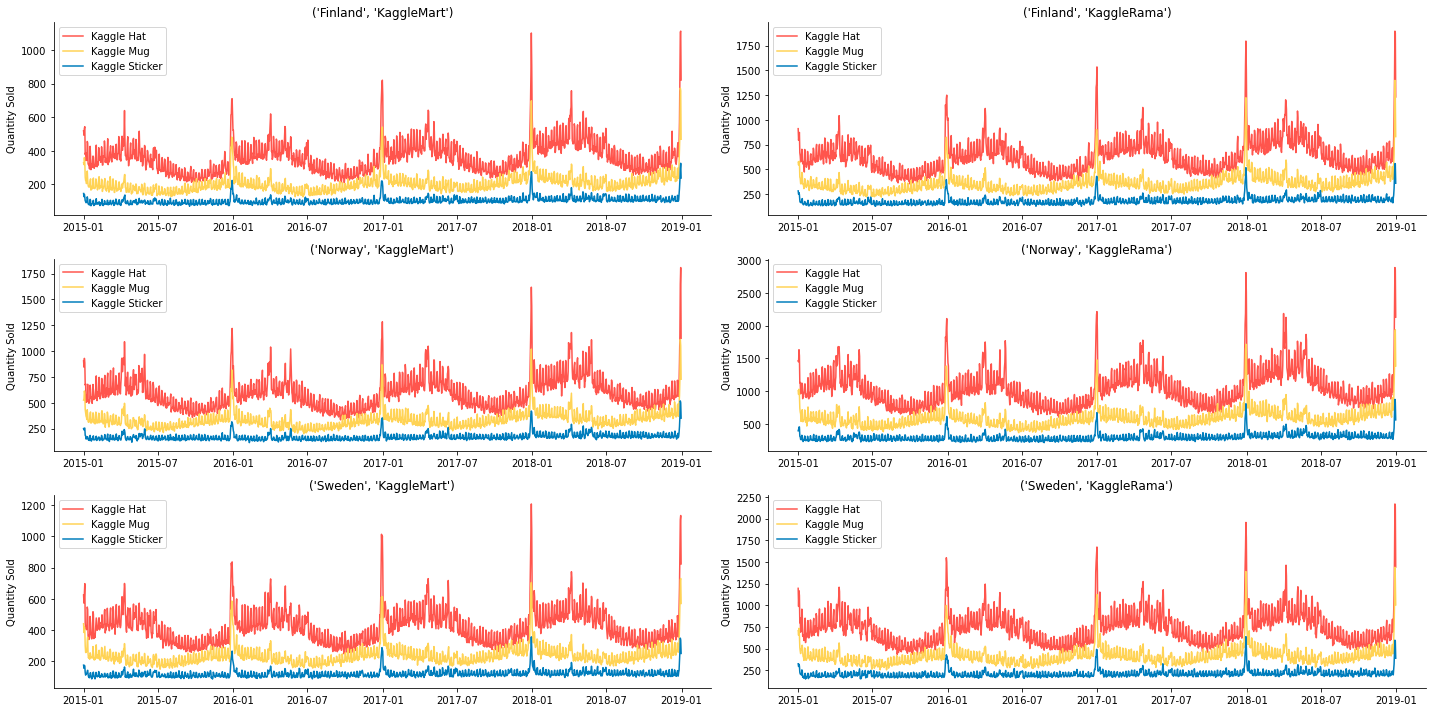

In [59]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
axes = axes.flatten()

dfs = [fin_mart, fin_rama, nor_mart, nor_rama, swe_mart, swe_rama]
titles = [('Finland', 'KaggleMart'), ('Finland', 'KaggleRama'), 
          ('Norway', 'KaggleMart'), ('Norway', 'KaggleRama'), 
          ('Sweden', 'KaggleMart'), ('Sweden', 'KaggleRama')]

for i, df in enumerate(dfs):
    sns.lineplot(data=df, y='Kaggle Hat', x=fin_mart.index, ax=axes[i], 
                color='#ff554d', label='Kaggle Hat')
    sns.lineplot(data=df, y='Kaggle Mug', x=fin_mart.index, ax=axes[i],
                 color='#ffd355', label='Kaggle Mug')
    sns.lineplot(data=df, y='Kaggle Sticker', x=fin_mart.index, ax=axes[i], 
                 color='#007dbc', label='Kaggle Sticker')
    for s in ['top', 'right']:
        axes[i].spines[s].set_visible(False)
        
    axes[i].set_ylabel('Quantity Sold')
    axes[i].set_xlabel('')
    axes[i].title.set_text(titles[i])

plt.tight_layout()
plt.show()

### TS DECOMPOSITION

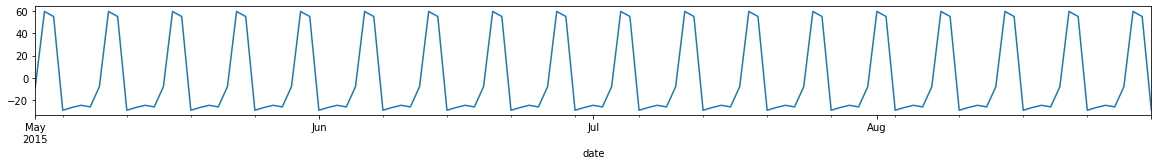

In [70]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(fin_mart['Kaggle Hat'])

rcParams['figure.figsize'] = 20, 2
decomposition.seasonal['2015-05':'2015-08'].plot()
plt.show()

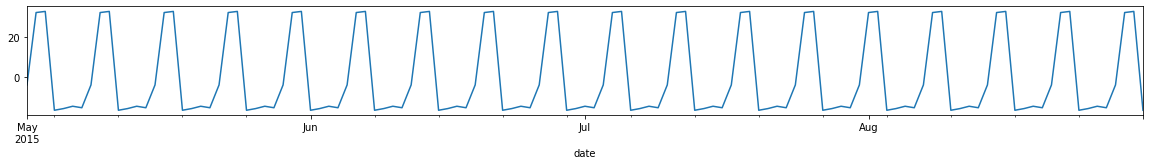

In [71]:
decomposition = sm.tsa.seasonal_decompose(fin_mart['Kaggle Mug'])

rcParams['figure.figsize'] = 20, 2
decomposition.seasonal['2015-05':'2015-08'].plot()
plt.show()

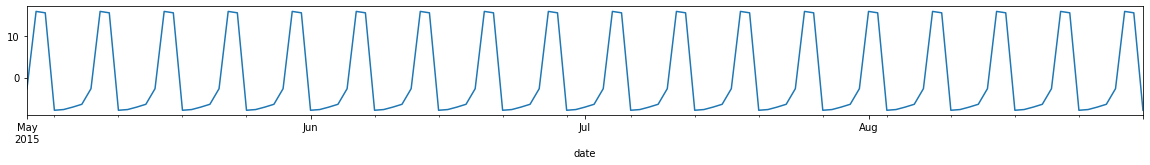

In [72]:
decomposition = sm.tsa.seasonal_decompose(fin_mart['Kaggle Sticker'])

rcParams['figure.figsize'] = 20, 2
decomposition.seasonal['2015-05':'2015-08'].plot()
plt.show()

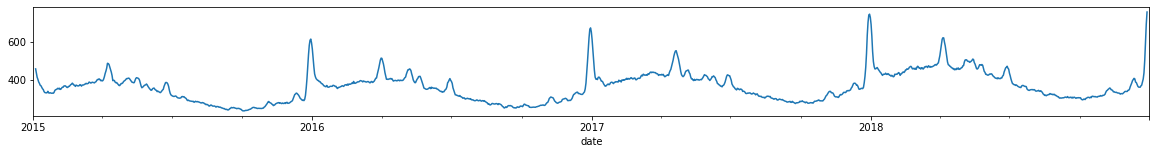

In [73]:
decomposition = sm.tsa.seasonal_decompose(fin_mart['Kaggle Hat'])

rcParams['figure.figsize'] = 20, 2
decomposition.trend.plot()
plt.show()

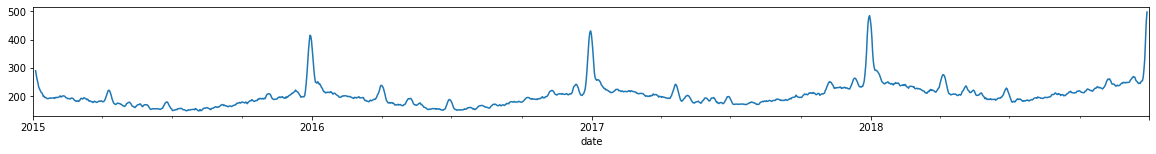

In [74]:
decomposition = sm.tsa.seasonal_decompose(fin_mart['Kaggle Mug'])

rcParams['figure.figsize'] = 20, 2
decomposition.trend.plot()
plt.show()

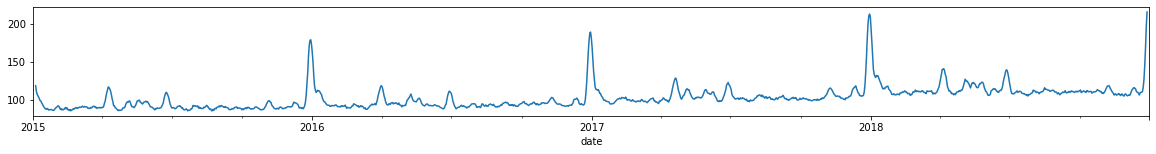

In [75]:
decomposition = sm.tsa.seasonal_decompose(fin_mart['Kaggle Sticker'])

rcParams['figure.figsize'] = 20, 2
decomposition.trend.plot()
plt.show()

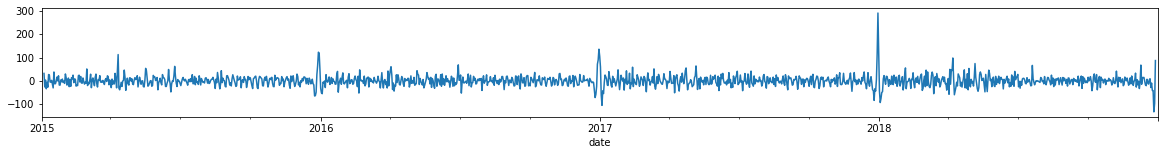

In [76]:
decomposition = sm.tsa.seasonal_decompose(fin_mart['Kaggle Hat'])

rcParams['figure.figsize'] = 20, 2
decomposition.resid.plot()
plt.show()

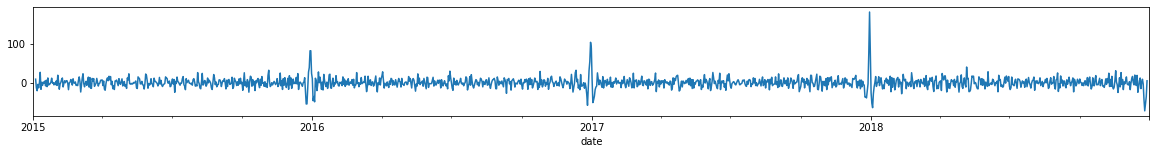

In [77]:
decomposition = sm.tsa.seasonal_decompose(fin_mart['Kaggle Mug'])

rcParams['figure.figsize'] = 20, 2
decomposition.resid.plot()
plt.show()

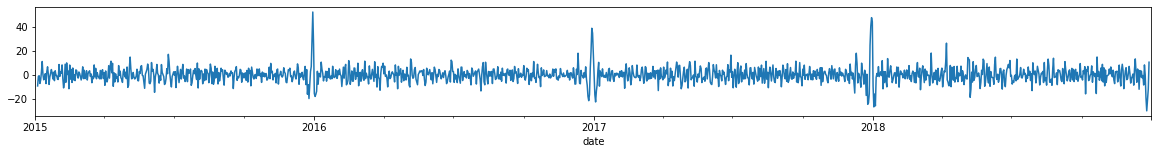

In [78]:
decomposition = sm.tsa.seasonal_decompose(fin_mart['Kaggle Sticker'])

rcParams['figure.figsize'] = 20, 2
decomposition.resid.plot()
plt.show()